In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as sts
import warnings

from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from sqlalchemy import create_engine
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

In [104]:
ogr = pd.read_csv("C:\\Users\\Gunesim\\Desktop\\Ödevler\\StudentsPerformance.csv", engine="python", encoding="utf8")
ogr.columns=["cinsiyet", "etnik_koken", "aile_egt_seviyesi", "ogle_yemegi", 
                 "hazirlik_kursu", "matematik_puani", "okuma_puani", "yazma_puani"]

1NCİ SORU:

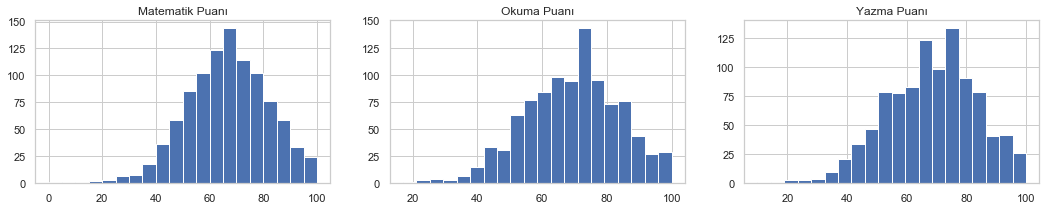

In [27]:
plt.figure(figsize=(18,3))

plt.subplot(1,3,1)
plt.hist(ogr["matematik_puani"], bins=20)
plt.title("Matematik Puanı")

plt.subplot(1,3,2)
plt.hist(ogr["okuma_puani"], bins=20)
plt.title("Okuma Puanı")

plt.subplot(1,3,3)
plt.hist(ogr["yazma_puani"], bins=20)
plt.title("Yazma Puanı")

plt.show()

In [105]:
pd.options.display.float_format="{:.5f}".format

ozellikler=["matematik_puani", "okuma_puani", "yazma_puani"]

testler=pd.DataFrame(columns=["ozellik", "jb_istatistik", "jb_p_degeri", "normal_istatistik", "normal_p_degeri"])

#59ncu satırda sıfır değeri bulunması sebebiyle, logaritma alabilmek için değerlere 0.001 ilave ediyoruz..
ogr["matematik_puani"]+=0.001

for i in ozellikler:
    jb=jarque_bera(np.log(ogr[i]))
    norm=normaltest(np.log(ogr[i]))
    
    testler=testler.append({"ozellik":i,
                            "jb_istatistik":jb[0],
                            "jb_p_degeri":jb[1],
                            "normal_istatistik":norm[0],
                            "normal_p_degeri":norm[1]},
                            ignore_index=True)

testler

,ozellik,jb_istatistik,jb_p_degeri,normal_istatistik,normal_p_degeri
0,matematik_puani,7353491.52550,0.00000,2107.22995,0.00000
1,okuma_puani,495.12732,0.00000,209.77151,0.00000
2,yazma_puani,1410.93701,0.00000,318.96921,0.00000


p değerleri 0 (sıfır) olduğu için sınav notlarının dağılımı normal dağılıma uymamaktadır. "scale" ve "normalize" yaparak normal dağılıma getirip Jarque-Bera yöntemi ile test edelim.

In [102]:
norm_testler=pd.DataFrame(columns=["ozellik", "jb_istatistik", "jb_p_degeri", "normal_istatistik", "normal_p_degeri"])

for i in ozellikler:
    sc=jarque_bera(scale(ogr[i]))
    norm=normaltest(normalize(np.array(ogr[i]).reshape(1,-1)).reshape(-1,1))
    
    norm_testler=norm_testler.append({
                            "ozellik":i,
                            "jb_istatistik":sc[0],
                            "jb_p_degeri":sc[1],
                            "normal_istatistik":norm[0],
                            "normal_p_degeri":norm[1]},
                            ignore_index=True)

testler

,ozellik,jb_istatistik,jb_p_degeri,normal_istatistik,normal_p_degeri
0,matematik_puani,6089270.61243,0.00000,2044.56654,0.00000
1,okuma_puani,495.12732,0.00000,209.77151,0.00000
2,yazma_puani,1410.93701,0.00000,318.96921,0.00000


Bu soruda; logaritma almadan yapınca p değerleri sıfırdan büyük çıkıyor. Alındığında da hem normalleştirme öncesi hem sonrasında sıfır çıkıyor.
???

2NCİ SORU:

In [111]:
ogr["sinav_ortalamasi"]=(ogr["matematik_puani"]+ogr["okuma_puani"]+ogr["yazma_puani"])/3

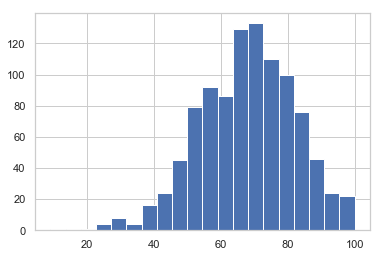

Sınav Ortalaması
------------------------------------------
JB İstatistik     : 2166.798800538761 
JB p degeri       : 0.0
Normal İstatistik : 361.8232766203273 
Normal p degeri   : 2.698197712853854e-79


In [100]:
plt.hist(ogr["sinav_ortalamasi"], bins=20)
plt.show()

jarq=jarque_bera(np.log(ogr["sinav_ortalamasi"]))
nrm=normaltest(np.log(ogr["sinav_ortalamasi"]))

print("Sınav Ortalaması\n------------------------------------------")
print("JB İstatistik     :", jarq[0],"\nJB p degeri       :", jarq[1])
print("Normal İstatistik :", nrm[0],"\nNormal p degeri   :", nrm[1])

p değeri; birinde 0 çıkıyor, diğerinde sıfırdan büyük çıkıyor. Hangisi alınacak???

3NCÜ SORU:

In [112]:
ogr.head()

,cinsiyet,etnik_koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_puani,okuma_puani,yazma_puani,sinav_ortalamasi
0,female,group B,bachelor's degree,standard,none,72.00100,72,74,72.66700
1,female,group C,some college,standard,completed,69.00100,90,88,82.33367
2,female,group B,master's degree,standard,none,90.00100,95,93,92.66700
3,male,group A,associate's degree,free/reduced,none,47.00100,57,44,49.33367
4,male,group C,some college,standard,none,76.00100,78,75,76.33367


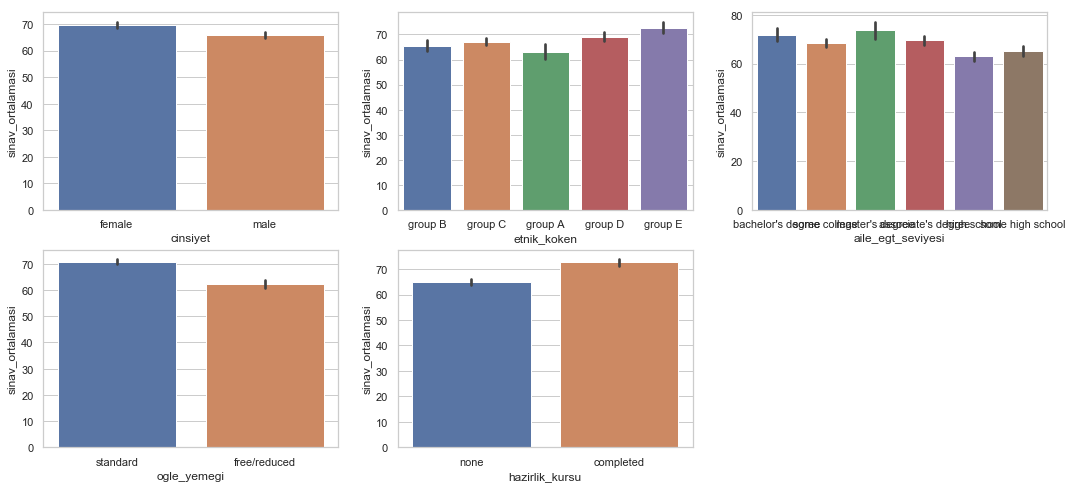

In [115]:
plt.figure(figsize=(18,8))

plt.subplot(2,3,1)
sns.barplot(ogr["cinsiyet"], ogr["sinav_ortalamasi"])
plt.subplot(2,3,2)
sns.barplot(ogr["etnik_koken"], ogr["sinav_ortalamasi"])
plt.subplot(2,3,3)
sns.barplot(ogr["aile_egt_seviyesi"], ogr["sinav_ortalamasi"])
plt.subplot(2,3,4)
sns.barplot(ogr["ogle_yemegi"], ogr["sinav_ortalamasi"])
plt.subplot(2,3,5)
sns.barplot(ogr["hazirlik_kursu"], ogr["sinav_ortalamasi"])

In [119]:
ttest_cinsiyet=sts.ttest_ind(ogr[ogr["cinsiyet"]=="female"]["sinav_ortalamasi"], 
                             ogr[ogr["cinsiyet"]=="male"]["sinav_ortalamasi"])
ttest_yemek=sts.ttest_ind(ogr[ogr["ogle_yemegi"]=="standard"]["sinav_ortalamasi"], 
                             ogr[ogr["ogle_yemegi"]=="free/reduced"]["sinav_ortalamasi"])
ttest_kurs=sts.ttest_ind(ogr[ogr["hazirlik_kursu"]=="none"]["sinav_ortalamasi"], 
                             ogr[ogr["hazirlik_kursu"]=="completed"]["sinav_ortalamasi"])

display("CİNSİYET", ttest_cinsiyet)
display("YEMEK", ttest_yemek)
display("HAZIRLIK KURSU", ttest_kurs)

'CİNSİYET'

Ttest_indResult(statistic=4.169913529142, pvalue=3.311973638243664e-05)

'YEMEK'

Ttest_indResult(statistic=9.575113051511469, pvalue=7.736791812495828e-21)

'HAZIRLIK KURSU'

Ttest_indResult(statistic=-8.390944443482592, pvalue=1.633780203592351e-16)

Etnik köken ve aile eğitim durumu da aynı şekilde t testine tabi tutulup p değeri 0'dan büyük olduğunda analize dahil edilir. Testini yaptığımız 3 değişken de sinav ortalaması ile ilişkilidir. Üçü de analize dahil edilir.